In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score

df = pd.read_csv("hf://datasets/scikit-learn/breast-cancer-wisconsin/breast_cancer.csv")

In [115]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [116]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [117]:
df = df.drop('Unnamed: 32', axis=1)

In [118]:
df = df.drop('id', axis=1)

In [119]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [120]:
X = df.iloc[:,1:]

In [121]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [122]:
Y = df.iloc[:,0]

In [123]:
Y.head

<bound method NDFrame.head of 0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object>

In [124]:
Y = Y.replace({'M': -1, 'B': 1}).astype(float)

/var/folders/7r/dyjn5gtx12d21k4msl4lhlv80000gn/T/ipykernel_89655/2714448523.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = Y.replace({'M': -1, 'B': 1}).astype(float)


In [125]:
import numpy as np
unique_values = np.unique(Y)
print("Unique values in Y:", unique_values)

Unique values in Y: [-1.  1.]


In [126]:
print(np.unique(Y, return_counts=True))

(array([-1.,  1.]), array([212, 357]))


In [127]:
Y = Y.values.reshape(-1, 1)

In [128]:
Y.shape

(569, 1)

In [129]:
X.shape

(569, 30)

In [130]:
""" X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)   """

print(Y.shape)
print(X.shape)
print(X_and_Y[0])

(569, 1)
(569, 30)
[1.398e+01 9.822e+01 6.561e+02 1.031e-01 1.836e-01 1.450e-01 6.300e-02
 2.086e-01 7.406e-02 5.462e-01 1.511e+00 4.795e+00 4.945e+01 9.976e-03
 5.244e-02 5.278e-02 1.580e-02 2.653e-02 5.444e-03 1.646e+01 1.834e+01
 1.141e+02 8.092e+02 1.312e-01 3.635e-01 3.219e-01 1.108e-01 2.827e-01
 9.208e-02 1.469e+01]


In [131]:
print(X.isna())

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          False         False           False      False            False   
1          False         False           False      False            False   
2          False         False           False      False            False   
3          False         False           False      False            False   
4          False         False           False      False            False   
..           ...           ...             ...        ...              ...   
564        False         False           False      False            False   
565        False         False           False      False            False   
566        False         False           False      False            False   
567        False         False           False      False            False   
568        False         False           False      False            False   

     compactness_mean  concavity_mean  concave points_mean  sym

In [132]:
print(X.shape)
print(Y.shape)

(569, 30)
(569, 1)


In [133]:
np.unique(Y)

array([-1.,  1.])

In [144]:
Y = Y.flatten()

In [145]:
Y

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,
       -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
        1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.,
        1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
        1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1

## Decision Tree Classifier

In [146]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the parameter grid
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the decision tree classifier
estimator = DecisionTreeClassifier(criterion='entropy')

# Split 1: Train size = 20%, Test size = 80%
X_train_20, X_test_20, Y_train_20, Y_test_20 = train_test_split(X, Y, train_size=0.2, random_state=42)
grid_search_20 = GridSearchCV(estimator, param_grid, cv=3, scoring="accuracy")
grid_search_20.fit(X_train_20, Y_train_20)
best_params_20 = grid_search_20.best_params_
cv_score_20 = grid_search_20.best_score_
additional_cv_score_20 = np.mean(cross_val_score(grid_search_20.best_estimator_, X_train_20, Y_train_20, cv=3))

print("Results for 20% training data:")
print("Best parameters:", best_params_20)
print(f"Cross-validated Accuracy (GridSearchCV): {cv_score_20:.4f}")
print(f"Additional Cross-validated Accuracy: {additional_cv_score_20:.4f}")
y_pred_20 = grid_search_20.best_estimator_.predict(X_test_20)
print("Classification Report:")
print(classification_report(Y_test_20, y_pred_20))

# Split 2: Train size = 50%, Test size = 50%
X_train_50, X_test_50, Y_train_50, Y_test_50 = train_test_split(X, Y, train_size=0.5, random_state=42)
grid_search_50 = GridSearchCV(estimator, param_grid, cv=3, scoring="accuracy")
grid_search_50.fit(X_train_50, Y_train_50)
best_params_50 = grid_search_50.best_params_
cv_score_50 = grid_search_50.best_score_
additional_cv_score_50 = np.mean(cross_val_score(grid_search_50.best_estimator_, X_train_50, Y_train_50, cv=3))

print("\nResults for 50% training data:")
print("Best parameters:", best_params_50)
print(f"Cross-validated Accuracy (GridSearchCV): {cv_score_50:.4f}")
print(f"Additional Cross-validated Accuracy: {additional_cv_score_50:.4f}")
y_pred_50 = grid_search_50.best_estimator_.predict(X_test_50)
print("Classification Report:")
print(classification_report(Y_test_50, y_pred_50))

# Split 3: Train size = 80%, Test size = 20%
X_train_80, X_test_80, Y_train_80, Y_test_80 = train_test_split(X, Y, train_size=0.8, random_state=42)
grid_search_80 = GridSearchCV(estimator, param_grid, cv=3, scoring="accuracy")
grid_search_80.fit(X_train_80, Y_train_80)
best_params_80 = grid_search_80.best_params_
cv_score_80 = grid_search_80.best_score_
additional_cv_score_80 = np.mean(cross_val_score(grid_search_80.best_estimator_, X_train_80, Y_train_80, cv=3))

print("\nResults for 80% training data:")
print("Best parameters:", best_params_80)
print(f"Cross-validated Accuracy (GridSearchCV): {cv_score_80:.4f}")
print(f"Additional Cross-validated Accuracy: {additional_cv_score_80:.4f}")
y_pred_80 = grid_search_80.best_estimator_.predict(X_test_80)
print("Classification Report:")
print(classification_report(Y_test_80, y_pred_80))


Results for 20% training data:
Best parameters: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validated Accuracy (GridSearchCV): 0.9118
Additional Cross-validated Accuracy: 0.9118
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.80      0.86       166
         1.0       0.89      0.97      0.93       290

    accuracy                           0.91       456
   macro avg       0.92      0.89      0.90       456
weighted avg       0.91      0.91      0.91       456


Results for 50% training data:
Best parameters: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
Cross-validated Accuracy (GridSearchCV): 0.9191
Additional Cross-validated Accuracy: 0.9156
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.91      0.95      0.93        98
         1.0       0.97      0.95      0.96       187

    accuracy                           0.95       285



Generating heatmaps...


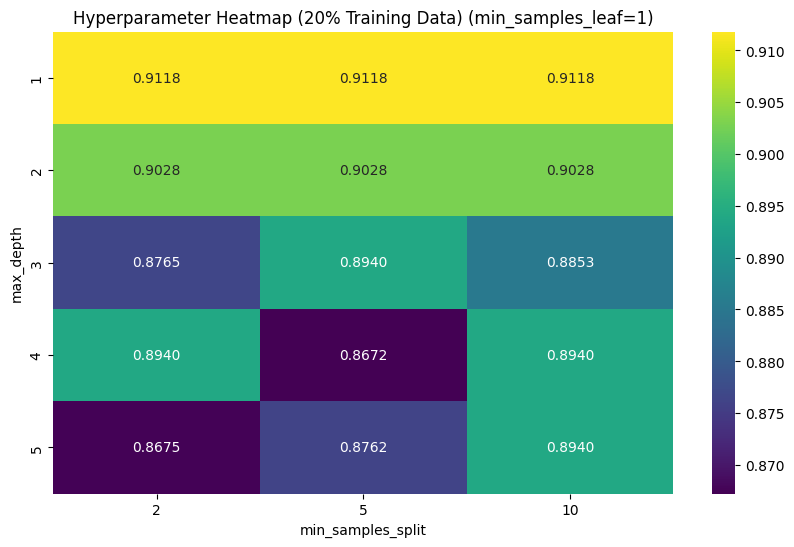

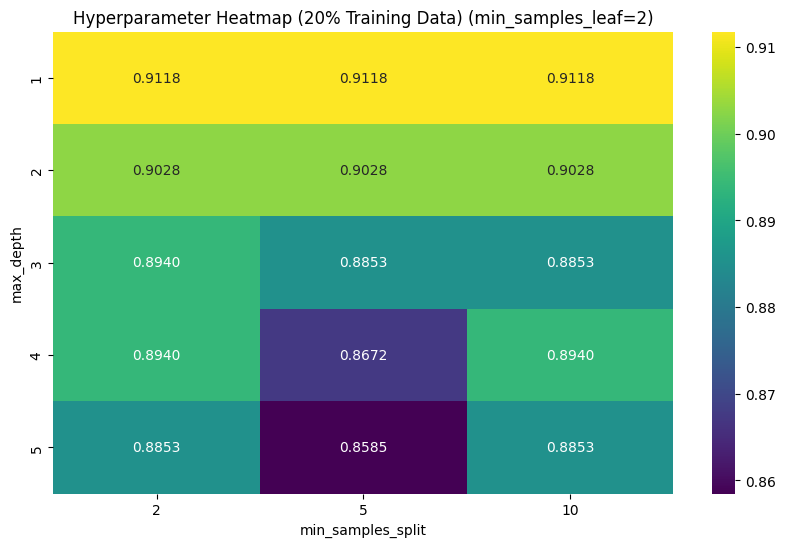

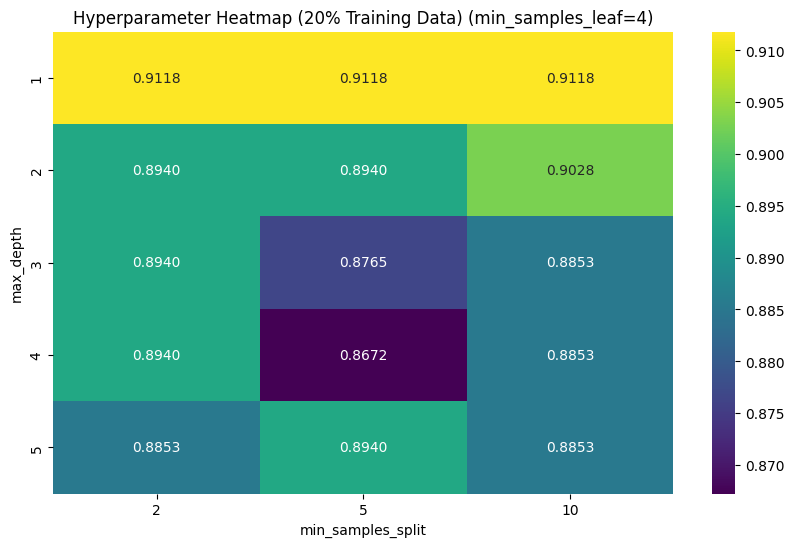

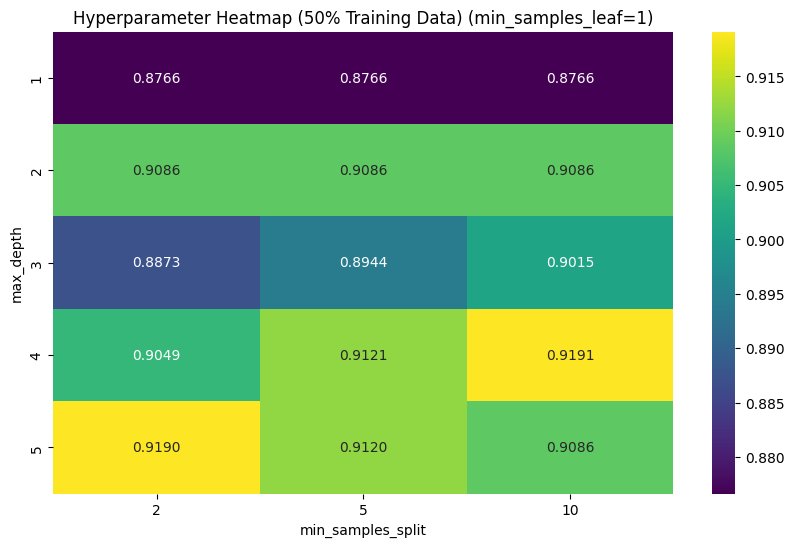

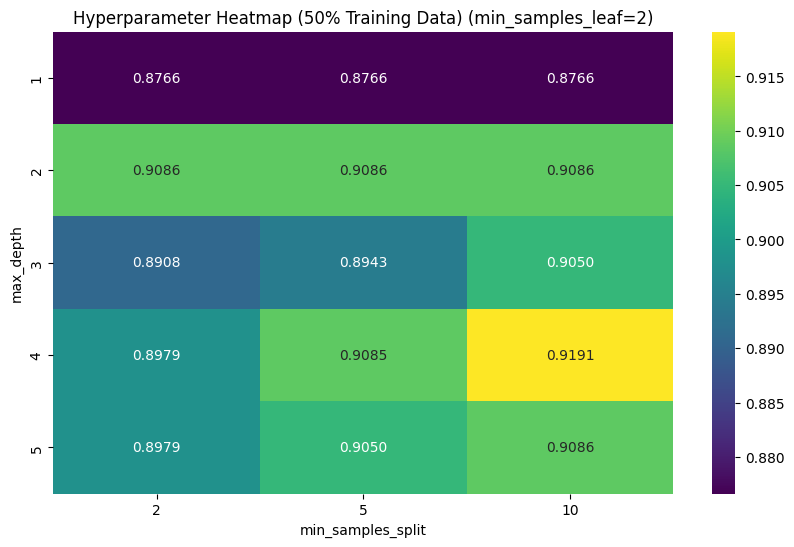

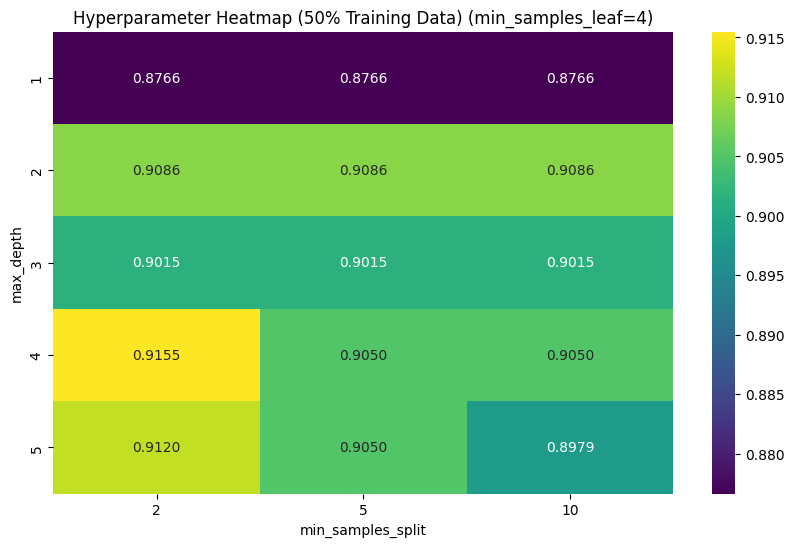

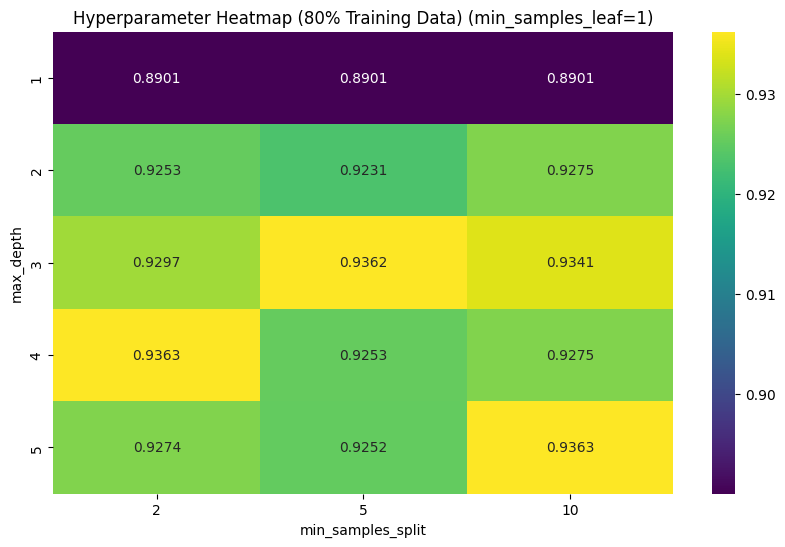

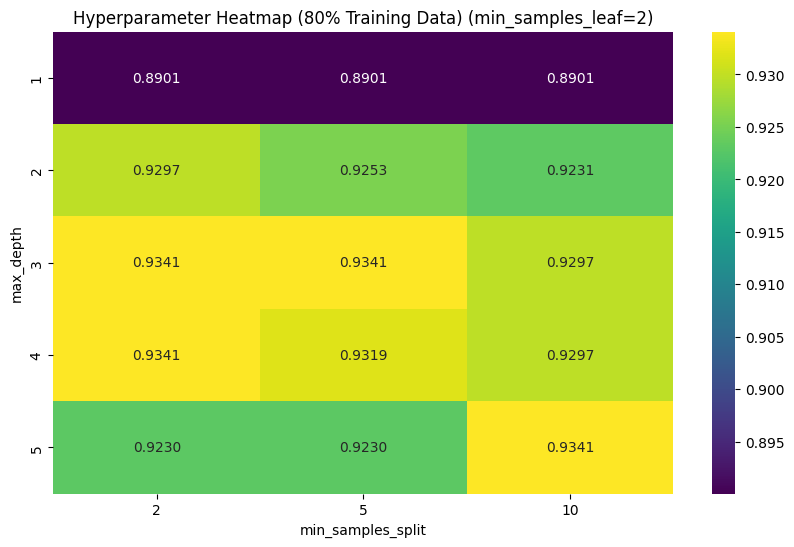

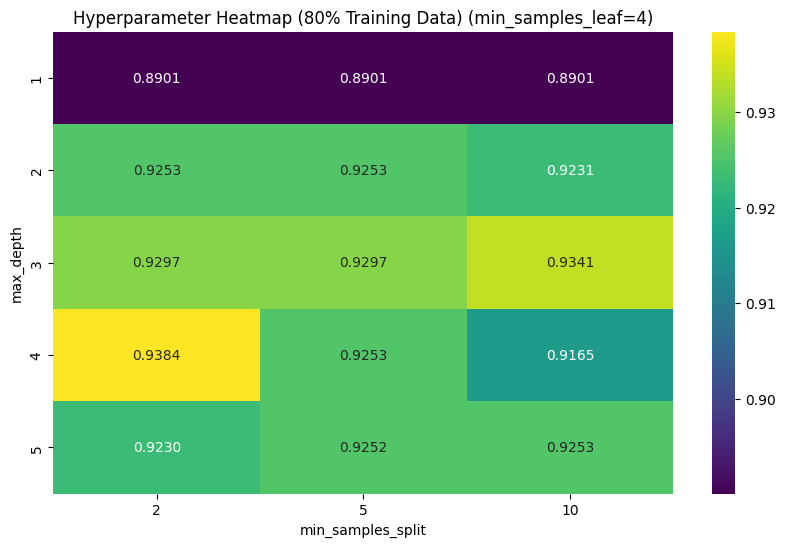

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot heatmap for a given grid search
def plot_heatmap(grid_search, param_grid, title):
    mean_test_scores = grid_search.cv_results_['mean_test_score']
    scores_matrix = mean_test_scores.reshape(
        len(param_grid['max_depth']),
        len(param_grid['min_samples_split']),
        len(param_grid['min_samples_leaf'])
    )
    
    for i, leaf_size in enumerate(param_grid['min_samples_leaf']):
        plt.figure(figsize=(10, 6))
        sns.heatmap(
            scores_matrix[:, :, i],
            annot=True,
            fmt=".4f",
            xticklabels=param_grid['min_samples_split'],
            yticklabels=param_grid['max_depth'],
            cmap="viridis"
        )
        plt.title(f"{title} (min_samples_leaf={leaf_size})")
        plt.xlabel("min_samples_split")
        plt.ylabel("max_depth")
        plt.show()

# Plot heatmaps for each split
print("\nGenerating heatmaps...")

# 20% Training
plot_heatmap(
    grid_search_20,
    param_grid,
    "Hyperparameter Heatmap (20% Training Data)"
)

# 50% Training
plot_heatmap(
    grid_search_50,
    param_grid,
    "Hyperparameter Heatmap (50% Training Data)"
)

# 80% Training
plot_heatmap(
    grid_search_80,
    param_grid,
    "Hyperparameter Heatmap (80% Training Data)"
)


### 20/80 Train Test Split 

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Assume best_params_20 is already defined from previous GridSearchCV

accuracies_20 = []

for trial in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=None, shuffle=True)
    
    # Create the classifier with best_params_20n
    best_model = DecisionTreeClassifier(criterion='entropy', **best_params_20)
    
    # Fit the model
    best_model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies_20.append(accuracy)
    
    print(f"\nTrial {trial + 1} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))

average_accuracy = np.mean(accuracies_20)
print(f"\nAverage Accuracy over 3 trials: {average_accuracy:.4f}")



Trial 1 Results:
Accuracy: 0.9013
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.88      0.85      0.86       169
         1.0       0.91      0.93      0.92       287

    accuracy                           0.90       456
   macro avg       0.90      0.89      0.89       456
weighted avg       0.90      0.90      0.90       456


Trial 2 Results:
Accuracy: 0.8991
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.98      0.74      0.85       171
         1.0       0.87      0.99      0.92       285

    accuracy                           0.90       456
   macro avg       0.92      0.87      0.89       456
weighted avg       0.91      0.90      0.90       456


Trial 3 Results:
Accuracy: 0.9035
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.79      0.86       175
         1.0       0.88      0.97      0.93       281

    accu

### 50/50 Train Test Split 

In [149]:


accuracies_50 = []

for trial in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=None, shuffle=True)
    
    # Create the classifier with best_params_20
    best_model = DecisionTreeClassifier(criterion='entropy', **best_params_50)
    
    # Fit the model
    best_model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies_50.append(accuracy)
    
    print(f"\nTrial {trial + 1} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))

average_accuracy = np.mean(accuracies_50)
print(f"\nAverage Accuracy over 3 trials: {average_accuracy:.4f}")



Trial 1 Results:
Accuracy: 0.9474
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.96      0.90      0.93       108
         1.0       0.94      0.98      0.96       177

    accuracy                           0.95       285
   macro avg       0.95      0.94      0.94       285
weighted avg       0.95      0.95      0.95       285


Trial 2 Results:
Accuracy: 0.9474
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.93      0.93       111
         1.0       0.95      0.96      0.96       174

    accuracy                           0.95       285
   macro avg       0.95      0.94      0.94       285
weighted avg       0.95      0.95      0.95       285


Trial 3 Results:
Accuracy: 0.8982
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.89      0.84      0.86       110
         1.0       0.90      0.94      0.92       175

    accu

## 80/20 Train Test Split 

In [150]:

accuracies_80 = []

for trial in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=None, shuffle=True)
    
    # Create the classifier with best_params_20
    best_model = DecisionTreeClassifier(criterion='entropy', **best_params_80)
    
    # Fit the model
    best_model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies_80.append(accuracy)
    
    print(f"\nTrial {trial + 1} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))

average_accuracy = np.mean(accuracies_80)
print(f"\nAverage Accuracy over 3 trials: {average_accuracy:.4f}")



Trial 1 Results:
Accuracy: 0.9298
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.90      0.92        52
         1.0       0.92      0.95      0.94        62

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114


Trial 2 Results:
Accuracy: 0.9386
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.89      0.91      0.90        34
         1.0       0.96      0.95      0.96        80

    accuracy                           0.94       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Trial 3 Results:
Accuracy: 0.9298
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.92      0.87      0.89        38
         1.0       0.94      0.96      0.95        76

    accu

## Implementing K-nearest neighbors 

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy
from matplotlib.colors import ListedColormap
from functools import partial

### parameter testing for 20/80 split

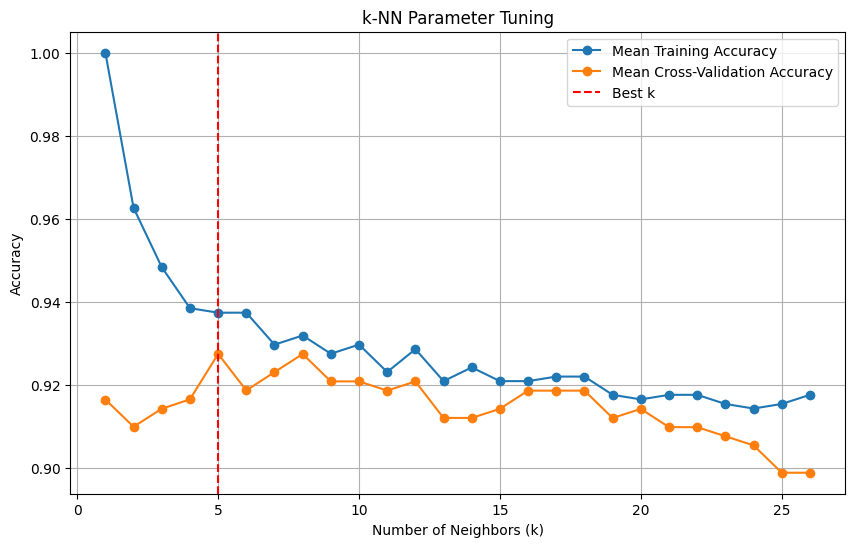

Best parameters: {'n_neighbors': np.int64(5)}
Best cross-validation score: 0.9274282560706402
Test accuracy with best parameters: 0.956140350877193


In [157]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Assuming X and Y are your feature matrix and target vector
# Example data (replace with your actual data)
# X = np.array(...)  # Your feature data
# Y = np.array(...)  # Your target data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
k_values = np.arange(1,27)
# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': k_values}  # Testing k values from 1 to 20

# Create a k-NN classifier
knn = KNeighborsClassifier()\

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

mean_train_scores = grid_search.cv_results_['mean_train_score']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_train_scores, label='Mean Training Accuracy', marker='o')
plt.plot(k_values, mean_test_scores, label='Mean Cross-Validation Accuracy', marker='o')
plt.axvline(grid_search.best_params_['n_neighbors'], color='r', linestyle='--', label='Best k')
plt.title('k-NN Parameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate on the test set using the best model
best_knn = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
print("Test accuracy with best parameters:", test_accuracy)

### KNN for 20/80 split

In [156]:
# Assuming X, Y, and best_params are defined

# Initialize variables for storing results
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform 3 trials
for trial in range(3):
    print(f"Trial {trial + 1}")

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None, train_size=0.2, shuffle=True)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)  # Use transform, not fit_transform, for test data

    # Train the KNN classifier
    knn = KNeighborsClassifier(**best_params)
    knn.fit(X_train, Y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and save accuracy
    accuracy = knn.score(X_test, Y_test)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}")

    # Calculate and save confusion matrix and classification report
    cm = confusion_matrix(Y_test, y_pred)
    confusion_matrices.append(cm)
    print(f"Confusion Matrix:\n{cm}")

    cr = classification_report(Y_test, y_pred)
    classification_reports.append(cr)
    print(f"Classification Report:\n{cr}")

# Calculate the average accuracy
average_accuracy_1 = np.mean(accuracies)
print("\nFinal Report")
print(f"Average Accuracy: {average_accuracy_1}")


Trial 1
Accuracy: 0.9385964912280702
Confusion Matrix:
[[151  19]
 [  9 277]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.89      0.92       170
         1.0       0.94      0.97      0.95       286

    accuracy                           0.94       456
   macro avg       0.94      0.93      0.93       456
weighted avg       0.94      0.94      0.94       456

Trial 2
Accuracy: 0.9539473684210527
Confusion Matrix:
[[158  14]
 [  7 277]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.96      0.92      0.94       172
         1.0       0.95      0.98      0.96       284

    accuracy                           0.95       456
   macro avg       0.95      0.95      0.95       456
weighted avg       0.95      0.95      0.95       456

Trial 3
Accuracy: 0.9495614035087719
Confusion Matrix:
[[147  21]
 [  2 286]]
Classification Report:
              precision    recall  f1-score

### parameter testing for 50/50

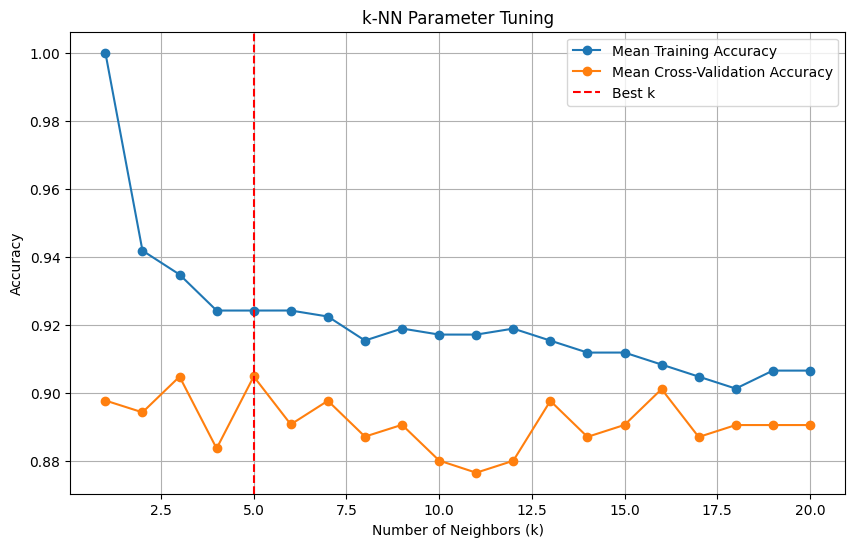

Best parameters: {'n_neighbors': np.int64(5)}
Best cross-validation score: 0.9049272116461365
Test accuracy with best parameters: 0.9578947368421052


In [158]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}  # Testing k values from 1 to 20

# Create a k-NN classifier
knn = KNeighborsClassifier()\

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Visualize the results
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_train_scores, label='Mean Training Accuracy', marker='o')
plt.plot(k_values, mean_test_scores, label='Mean Cross-Validation Accuracy', marker='o')
plt.axvline(grid_search.best_params_['n_neighbors'], color='r', linestyle='--', label='Best k')
plt.title('k-NN Parameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate on the test set using the best model
best_knn = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
print("Test accuracy with best parameters:", test_accuracy)

## KNN for 50/50 split

In [159]:


# Initialize variables for storing results
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform 3 trials
for trial in range(3):
    print(f"Trial {trial + 1}")

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None, train_size=0.5, shuffle=True)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)  # Use transform, not fit_transform, for test data

    # Train the KNN classifier
    knn = KNeighborsClassifier(**best_params)
    knn.fit(X_train, Y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and save accuracy
    accuracy = knn.score(X_test, Y_test)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}")

    # Calculate and save confusion matrix and classification report
    cm = confusion_matrix(Y_test, y_pred)
    confusion_matrices.append(cm)
    print(f"Confusion Matrix:\n{cm}")

    cr = classification_report(Y_test, y_pred)
    classification_reports.append(cr)
    print(f"Classification Report:\n{cr}")

# Calculate the average accuracy
average_accuracy_2 = np.mean(accuracies)
print("\nFinal Report")
print(f"Average Accuracy: {average_accuracy_2}")


Trial 1
Accuracy: 0.9614035087719298
Confusion Matrix:
[[ 98   9]
 [  2 176]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.98      0.92      0.95       107
         1.0       0.95      0.99      0.97       178

    accuracy                           0.96       285
   macro avg       0.97      0.95      0.96       285
weighted avg       0.96      0.96      0.96       285

Trial 2
Accuracy: 0.9789473684210527
Confusion Matrix:
[[101   3]
 [  3 178]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.97      0.97      0.97       104
         1.0       0.98      0.98      0.98       181

    accuracy                           0.98       285
   macro avg       0.98      0.98      0.98       285
weighted avg       0.98      0.98      0.98       285

Trial 3
Accuracy: 0.9438596491228071
Confusion Matrix:
[[ 94  15]
 [  1 175]]
Classification Report:
              precision    recall  f1-score

### parameter testing for 80/20

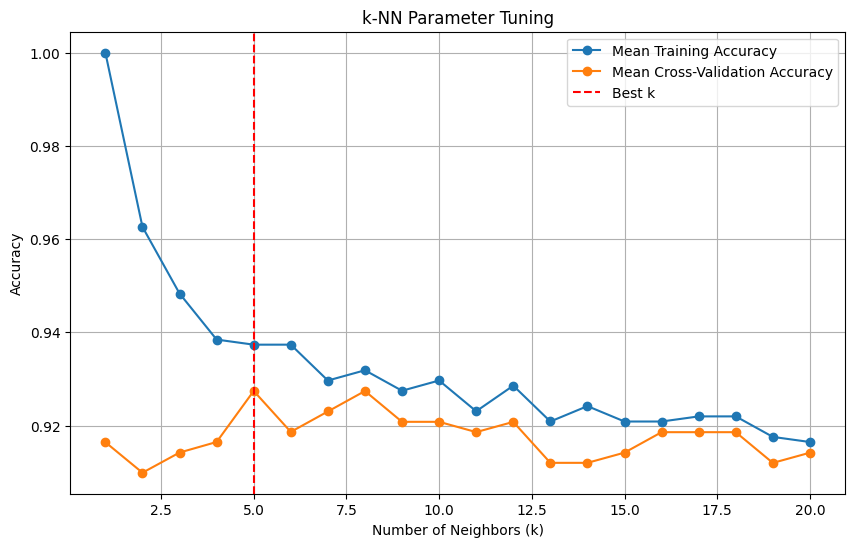

Best parameters: {'n_neighbors': np.int64(5)}
Best cross-validation score: 0.9274282560706402
Test accuracy with best parameters: 0.956140350877193


In [160]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}  # Testing k values from 1 to 20

# Create a k-NN classifier
knn = KNeighborsClassifier()\

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Visualize the results
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_train_scores, label='Mean Training Accuracy', marker='o')
plt.plot(k_values, mean_test_scores, label='Mean Cross-Validation Accuracy', marker='o')
plt.axvline(grid_search.best_params_['n_neighbors'], color='r', linestyle='--', label='Best k')
plt.title('k-NN Parameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate on the test set using the best model
best_knn = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
print("Test accuracy with best parameters:", test_accuracy)

## KNN for 80/20

In [161]:
# Assuming X, Y, and best_params are defined

# Initialize variables for storing results
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform 3 trials
for trial in range(3):
    print(f"Trial {trial + 1}")

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None, train_size=0.8,shuffle=True)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)  # Use transform, not fit_transform, for test data

    # Train the KNN classifier
    knn = KNeighborsClassifier(**best_params)
    knn.fit(X_train, Y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and save accuracy
    accuracy = knn.score(X_test, Y_test)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}")

    # Calculate and save confusion matrix and classification report
    cm = confusion_matrix(Y_test, y_pred)
    confusion_matrices.append(cm)
    print(f"Confusion Matrix:\n{cm}")

    cr = classification_report(Y_test, y_pred)
    classification_reports.append(cr)
    print(f"Classification Report:\n{cr}")

# Calculate the average accuracy
average_accuracy_3 = np.mean(accuracies)
print("\nFinal Report")
print(f"Average Accuracy: {average_accuracy_3}")


Trial 1
Accuracy: 0.9649122807017544
Confusion Matrix:
[[40  3]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.98      0.93      0.95        43
         1.0       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Trial 2
Accuracy: 0.9824561403508771
Confusion Matrix:
[[39  2]
 [ 0 73]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       1.00      0.95      0.97        41
         1.0       0.97      1.00      0.99        73

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Trial 3
Accuracy: 0.9824561403508771
Confusion Matrix:
[[46  2]
 [ 0 66]]
Classification Report:
              precision    recall  f1-score   support



# Random Forest Classifier 

In [162]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X, Y are defined

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'max_features': [1, 8, 20]
}

# Find best parameters for each split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, Y, train_size=0.2, random_state=42)
grid_search_20 = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search_20.fit(X_train_20, y_train_20)
best_params_20 = grid_search_20.best_params_

X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, Y, train_size=0.5, random_state=42)
grid_search_50 = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search_50.fit(X_train_50, y_train_50)
best_params_50 = grid_search_50.best_params_

X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, Y, train_size=0.8, random_state=42)
grid_search_80 = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search_80.fit(X_train_80, y_train_80)
best_params_80 = grid_search_80.best_params_

# Visualization of hyperparameter tuning
results_20 = grid_search_20.cv_results_
results_50 = grid_search_50.cv_results_
results_80 = grid_search_80.cv_results_

In [163]:
print(best_params_20)
print(best_params_50)
print(best_params_80)

{'max_depth': 20, 'max_features': 1, 'min_samples_split': 5, 'n_estimators': 150}
{'max_depth': 10, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 150}
{'max_depth': None, 'max_features': 1, 'min_samples_split': 5, 'n_estimators': 150}


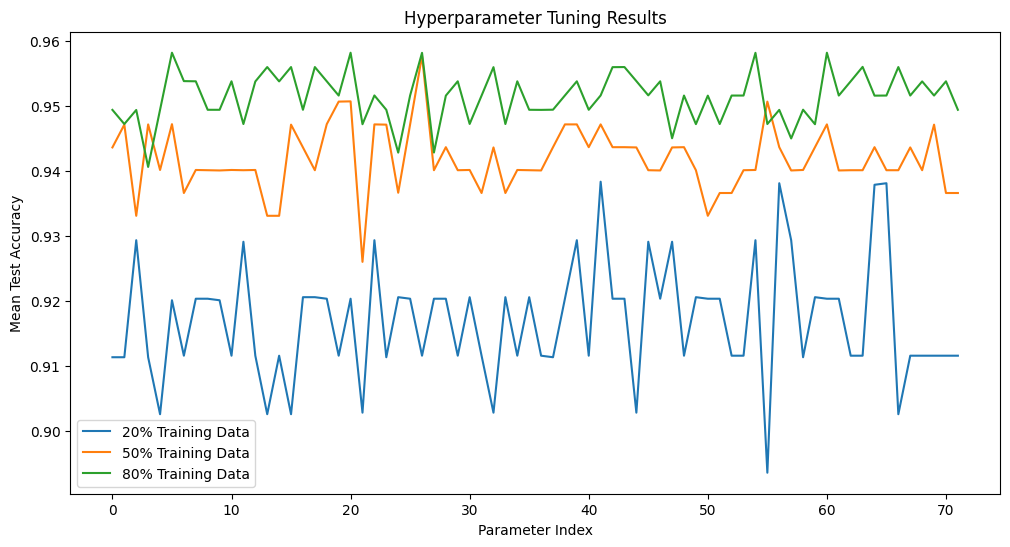

In [164]:
plt.figure(figsize=(12, 6))
plt.plot(results_20['mean_test_score'], label='20% Training Data')
plt.plot(results_50['mean_test_score'], label='50% Training Data')
plt.plot(results_80['mean_test_score'], label='80% Training Data')
plt.xlabel('Parameter Index')
plt.ylabel('Mean Test Accuracy')
plt.title('Hyperparameter Tuning Results')
plt.legend()
plt.show()

## RF for 20/80


In [165]:
# Code block for 20% split
print("20% Training Data")
accuracies_20 = []
for trial in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.2, random_state=None, shuffle=True)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf = RandomForestClassifier(**best_params_20)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_20.append(accuracy)
    print(f"Trial {trial + 1} Accuracy: {accuracy}")
    print(f"Classification Report for Trial {trial + 1}: {classification_report(y_test, y_pred)}")
print(f"Average Accuracy for 20% Training Data: {np.mean(accuracies_20)}\n")

average_accuracy_20 = np.mean(accuracies_20)
print(f"Average Accuracy for 20% Training Data: {average_accuracy_20:.4f}\n")



20% Training Data
Trial 1 Accuracy: 0.9627192982456141
Classification Report for Trial 1:               precision    recall  f1-score   support

        -1.0       0.95      0.95      0.95       164
         1.0       0.97      0.97      0.97       292

    accuracy                           0.96       456
   macro avg       0.96      0.96      0.96       456
weighted avg       0.96      0.96      0.96       456

Trial 2 Accuracy: 0.9583333333333334
Classification Report for Trial 2:               precision    recall  f1-score   support

        -1.0       0.97      0.91      0.94       167
         1.0       0.95      0.99      0.97       289

    accuracy                           0.96       456
   macro avg       0.96      0.95      0.95       456
weighted avg       0.96      0.96      0.96       456

Trial 3 Accuracy: 0.9473684210526315
Classification Report for Trial 3:               precision    recall  f1-score   support

        -1.0       0.95      0.91      0.93       170
   

## RF for 50/50

In [171]:
# Code block for 50% split
print("50% Training Data")
accuracies_50 = []
for trial in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, random_state=None, shuffle=True)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf = RandomForestClassifier(**best_params_50)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_50.append(accuracy)
    print(f"Trial {trial + 1} Accuracy: {accuracy}")
    print(f"Classification Report for Trial {trial + 1}: {classification_report(y_test, y_pred)}")
print(f"Average Accuracy for 50% Training Data: {np.mean(accuracies_50)}\n")

average_accuracy_50 = np.mean(accuracies_50)
print(f"Average Accuracy for 50% Training Data: {average_accuracy_50:.4f}\n")

50% Training Data
Trial 1 Accuracy: 0.9649122807017544
Classification Report for Trial 1:               precision    recall  f1-score   support

        -1.0       0.96      0.94      0.95       104
         1.0       0.97      0.98      0.97       181

    accuracy                           0.96       285
   macro avg       0.96      0.96      0.96       285
weighted avg       0.96      0.96      0.96       285

Trial 2 Accuracy: 0.9333333333333333
Classification Report for Trial 2:               precision    recall  f1-score   support

        -1.0       0.89      0.92      0.90        95
         1.0       0.96      0.94      0.95       190

    accuracy                           0.93       285
   macro avg       0.92      0.93      0.93       285
weighted avg       0.93      0.93      0.93       285

Trial 3 Accuracy: 0.9719298245614035
Classification Report for Trial 3:               precision    recall  f1-score   support

        -1.0       0.95      0.97      0.96       103
   

## RF for 80/20

In [170]:
# Code block for 80% split
print("80% Training Data")
accuracies_80 = []
for trial in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=None, shuffle=True)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf = RandomForestClassifier(**best_params_80)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_80.append(accuracy)
    print(f"Trial {trial + 1} Accuracy: {accuracy}")
    print(f"Classification Report for Trial {trial + 1}:{classification_report(y_test, y_pred)}")
print(f"Average Accuracy for 80% Training Data: {np.mean(accuracies_80)}\n")

average_accuracy_80 = np.mean(accuracies_80)
print(f"Average Accuracy for 80% Training Data: {average_accuracy_80:.4f}\n")

80% Training Data
Trial 1 Accuracy: 0.956140350877193
Classification Report for Trial 1:              precision    recall  f1-score   support

        -1.0       0.95      0.93      0.94        45
         1.0       0.96      0.97      0.96        69

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Trial 2 Accuracy: 0.9473684210526315
Classification Report for Trial 2:              precision    recall  f1-score   support

        -1.0       0.95      0.90      0.93        42
         1.0       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Trial 3 Accuracy: 0.9912280701754386
Classification Report for Trial 3:              precision    recall  f1-score   support

        -1.0       1.00      0.98      0.99        41
       